In [9]:
import pandas as pd
from prophet import Prophet
import datetime

daily_visits = pd.read_csv('../data/daily-visits.csv')
daily_visits.ds = pd.to_datetime(daily_visits.ds)

daily_visits

,ds,y
0,2022-02-13,172
1,2022-02-12,195
2,2022-02-11,234
3,2022-02-10,232
4,2022-02-09,222
...,...,...
3571,2012-05-05,180
3572,2012-05-04,210
3573,2012-05-03,204
3574,2012-05-02,201


In [2]:
from prophet.plot import add_changepoints_to_plot

m = Prophet(interval_width=0.80, changepoint_prior_scale=0.5, changepoint_range=0.99, n_changepoints=50)
m.fit(df)
future = m.make_future_dataframe(periods=14, freq='D')
forecast = m.predict(future)
# forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-05-01,197.202024,184.521361,231.230940,197.202024,197.202024,11.965800,11.965800,11.965800,12.538415,12.538415,12.538415,-0.572615,-0.572615,-0.572615,0.0,0.0,0.0,209.167823
1,2012-05-02,197.211150,177.856875,223.814029,197.211150,197.211150,4.160322,4.160322,4.160322,4.871414,4.871414,4.871414,-0.711093,-0.711093,-0.711093,0.0,0.0,0.0,201.371472
2,2012-05-03,197.220277,176.215099,221.025908,197.220277,197.220277,2.220806,2.220806,2.220806,3.055710,3.055710,3.055710,-0.834904,-0.834904,-0.834904,0.0,0.0,0.0,199.441083
3,2012-05-04,197.229404,178.409172,226.598020,197.229404,197.229404,5.373950,5.373950,5.373950,6.311859,6.311859,6.311859,-0.937909,-0.937909,-0.937909,0.0,0.0,0.0,202.603354
4,2012-05-05,197.238531,144.036488,192.676527,197.238531,197.238531,-29.178975,-29.178975,-29.178975,-28.164246,-28.164246,-28.164246,-1.014729,-1.014729,-1.014729,0.0,0.0,0.0,168.059555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,2022-02-23,190.997792,177.705757,223.507702,190.997792,190.997792,10.190187,10.190187,10.190187,4.871414,4.871414,4.871414,5.318772,5.318772,5.318772,0.0,0.0,0.0,201.187979
3586,2022-02-24,190.604036,176.083274,223.232170,190.604036,190.604036,9.211134,9.211134,9.211134,3.055710,3.055710,3.055710,6.155424,6.155424,6.155424,0.0,0.0,0.0,199.815170
3587,2022-02-25,190.210280,179.197845,226.272608,190.210280,190.210280,13.270080,13.270080,13.270080,6.311859,6.311859,6.311859,6.958222,6.958222,6.958222,0.0,0.0,0.0,203.480361
3588,2022-02-26,189.816524,146.608765,192.039514,189.816524,189.816524,-20.443988,-20.443988,-20.443988,-28.164246,-28.164246,-28.164246,7.720258,7.720258,7.720258,0.0,0.0,0.0,169.372536


In [3]:
# forecast.to_csv('../data/daily-visits-forecast.csv', index=False)

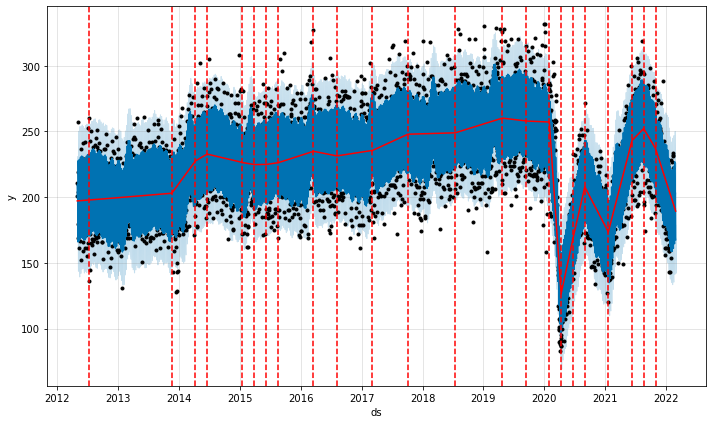

In [4]:
# fig1 = m.plot(forecast)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


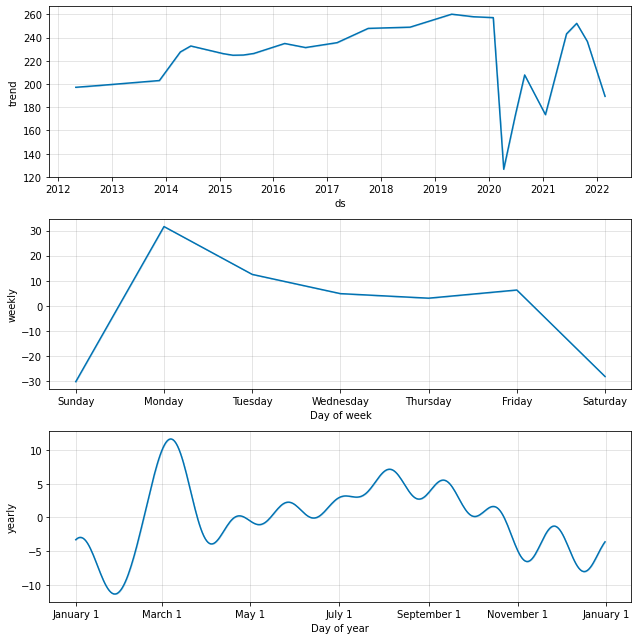

In [31]:
fig2 = m.plot_components(forecast)

In [17]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [23]:
# Python
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


start_date = '2020-02-01'

df = daily_visits[daily_visits.ds>=start_date]
print(df.tail())

param_grid = {  
    'changepoint_prior_scale': [10],
    'seasonality_prior_scale': [0.01],
    'seasonality_mode': ['multiplicative'],
    'holidays_prior_scale': [0.1],
    'changepoint_range':[0.9],
    'n_changepoints':[100]

}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).add_country_holidays(country_name='CA').fit(df)  # Fit model with given params
    df_cv = cross_validation(m, 
    # cutoffs=cutoffs, 
    horizon='7 days', 
    parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds    y
739 2020-02-05  265
740 2020-02-04  281
741 2020-02-03  285
742 2020-02-02  217
743 2020-02-01  216


INFO:prophet:Making 106 forecasts with cutoffs between 2021-02-03 12:00:00 and 2022-02-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7faf83329f10>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 106 forecasts with cutoffs between 2021-02-03 12:00:00 and 2022-02-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7faf9f3e5c10>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 106 forecasts with cutoffs between 2021-02-03 12:00:00 and 2022-02-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7faf83f56c10>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 106 forecasts with cutoffs between 2021-02-0

   changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                      0.1                     0.01   multiplicative   
1                      0.5                     0.01   multiplicative   
2                      1.0                     0.01   multiplicative   
3                      5.0                     0.01   multiplicative   
4                     10.0                     0.01   multiplicative   
5                     50.0                     0.01   multiplicative   
6                    100.0                     0.01   multiplicative   

   holidays_prior_scale  changepoint_range  n_changepoints       rmse  
0                   0.1                0.9             100  21.781024  
1                   0.1                0.9             100  19.003277  
2                   0.1                0.9             100  18.772630  
3                   0.1                0.9             100  18.741238  
4                   0.1                0.9             100  18.